# Aula 10 - Pré-processamento de Dados: Transformação e Normalização

**Curso:** Programação para Ciência de Dados  
**Aluno:** Gisele Fonseca  
**Data:** 06 de novembro

## Instruções
1. Complete todos os exercícios marcados com `# === SEU CÓDIGO AQUI ===`
2. Execute as células de teste para verificar suas respostas
3. Não modifique as células de teste
4.  Execute todas as células em ordem
5.  Respostas devem ser armazenadas nas variáveis indicadas

## Critérios de Avaliação
- **Conteúdo (100%):** Testes automáticos

---

### Objetivos

Nesta prática, você irá:
1. Criar features derivadas úteis (Feature Engineering)
2. Aplicar encoding apropriado para variáveis categóricas
3. Normalizar dados numéricos para análise comparativa

### Dataset

Utilizaremos o **Customer Churn Dataset** - dados de clientes de uma empresa de telecomunicações.



## Setup Inicial

In [1]:
# === CONFIGURAÇÃO INICIAL ===

!pip install --upgrade pip --quiet
!pip cache purge
!pip install --upgrade otter-grader --quiet
!mkdir -p tests

print("✅ Configuração concluída!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00
Files removed: 6 (1.8 MB)
✅ Configuração concluída!


In [2]:
%%writefile tests/q1.py
OK_FORMAT = True

test = {
    "name": "q1",
    "points": 1.5,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Coluna criada
>>> 'AvgMonthlySpend' in df.columns
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Tratamento de tenure = 0
>>> import pandas as pd
>>> import numpy as np
>>> df_test = pd.DataFrame({
...     'tenure': [0, 10, 20],
...     'MonthlyCharges': [50.0, 60.0, 70.0],
...     'TotalCharges': [0.0, 600.0, 1400.0]
... })
>>> df_test['AvgMonthlySpend'] = df_test['TotalCharges'] / df_test['tenure']
>>> df_test['AvgMonthlySpend'] = df_test['AvgMonthlySpend'].replace([np.inf, -np.inf], np.nan)
>>> df_test.loc[df_test['tenure'] == 0, 'AvgMonthlySpend'] = df_test.loc[df_test['tenure'] == 0, 'MonthlyCharges']
>>> not df_test['AvgMonthlySpend'].isna().any()
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 3: Valores válidos (sem infinitos ou NaN)
>>> not df['AvgMonthlySpend'].isna().any()
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 4: Valores positivos
>>> bool((df['AvgMonthlySpend'] >= 0).all())
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q1.py


In [3]:
%%writefile tests/q2.py
OK_FORMAT = True

test = {
    "name": "q2",
    "points": 1.5,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Coluna criada
>>> 'TotalServices' in df.columns
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Tipo correto (inteiro)
>>> df['TotalServices'].dtype in ['int64', 'int32']
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 3: Range válido (0 a 9 serviços)
>>> bool((df['TotalServices'] >= 0).all() and (df['TotalServices'] <= 9).all())
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 4: Lógica de contagem
>>> import pandas as pd
>>> df_test = pd.DataFrame({
...     'PhoneService': ['Yes', 'No'],
...     'MultipleLines': ['Yes', 'No phone service'],
...     'InternetService': ['DSL', 'No'],
...     'OnlineSecurity': ['Yes', 'No internet service'],
...     'OnlineBackup': ['No', 'No internet service'],
...     'DeviceProtection': ['Yes', 'No internet service'],
...     'TechSupport': ['No', 'No internet service'],
...     'StreamingTV': ['Yes', 'No internet service'],
...     'StreamingMovies': ['Yes', 'No internet service']
... })
>>> service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
>>> df_test['TotalServices'] = 0
>>> for col in service_cols:
...     df_test['TotalServices'] += (~df_test[col].isin(['No', 'No internet service', 'No phone service'])).astype(int)
>>> bool(df_test['TotalServices'].iloc[0] == 7 and df_test['TotalServices'].iloc[1] == 0)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q2.py


In [4]:
%%writefile tests/q3.py
OK_FORMAT = True

test = {
    "name": "q3",
    "points": 1,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Coluna criada
>>> 'HighRiskProfile' in df.columns
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Valores binários (0 ou 1)
>>> set(df['HighRiskProfile'].unique()).issubset({0, 1})
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 3: Tipo correto (inteiro)
>>> df['HighRiskProfile'].dtype in ['int64', 'int32']
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 4: Lógica condicional
>>> import pandas as pd
>>> df_test = pd.DataFrame({
...     'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Month-to-month'],
...     'tenure': [5, 10, 15, 8],
...     'TotalServices': [1, 5, 2, 3]
... })
>>> df_test['HighRiskProfile'] = ((df_test['Contract'] == 'Month-to-month') & (df_test['tenure'] < 12) & (df_test['TotalServices'] <= 2)).astype(int)
>>> bool(df_test['HighRiskProfile'].iloc[0] == 1 and df_test['HighRiskProfile'].iloc[2] == 0)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q3.py


In [5]:
%%writefile tests/q4.py
OK_FORMAT = True

test = {
    "name": "q4",
    "points": 1,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Variável criada
>>> 'contract_encoded' in dir()
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Mesmo tamanho do dataset
>>> len(contract_encoded) == len(df)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 3: Valores corretos (0, 1, 2)
>>> set(contract_encoded.unique()).issubset({0, 1, 2})
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 4: Mapeamento correto
>>> import pandas as pd
>>> df_test = pd.DataFrame({'Contract': ['Month-to-month', 'One year', 'Two year']})
>>> mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
>>> encoded_test = df_test['Contract'].map(mapping)
>>> list(encoded_test) == [0, 1, 2]
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q4.py


In [6]:
%%writefile tests/q5.py
OK_FORMAT = True

test = {
    "name": "q5",
    "points": 1,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Variáveis criadas
>>> 'gender_encoded' in dir() and 'partner_encoded' in dir() and 'dependents_encoded' in dir()
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Valores binários em gender_encoded
>>> set(gender_encoded.unique()).issubset({0, 1})
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 3: Valores binários em partner_encoded
>>> set(partner_encoded.unique()).issubset({0, 1})
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 4: Valores binários em dependents_encoded
>>> set(dependents_encoded.unique()).issubset({0, 1})
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 5: Mapeamento correto de gender
>>> import pandas as pd
>>> df_test = pd.DataFrame({'gender': ['Male', 'Female']})
>>> encoded_test = df_test['gender'].map({'Male': 1, 'Female': 0})
>>> list(encoded_test) == [1, 0]
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q5.py


In [7]:
%%writefile tests/q6.py
OK_FORMAT = True

test = {
    "name": "q6",
    "points": 1,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Variável criada
>>> 'internet_dummies' in dir()
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: É um DataFrame
>>> import pandas as pd
>>> isinstance(internet_dummies, pd.DataFrame)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 3: Número correto de colunas (2, porque drop_first=True)
>>> internet_dummies.shape[1] == 2
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 4: Prefixo correto
>>> all('InternetService_' in col for col in internet_dummies.columns)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 5: Valores binários (0 ou 1)
>>> all(set(internet_dummies[col].unique()).issubset({0, 1}) for col in internet_dummies.columns)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 6: Tipo inteiro
>>> all(internet_dummies[col].dtype in ['int64', 'int32'] for col in internet_dummies.columns)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q6.py


In [8]:
%%writefile tests/q7.py
OK_FORMAT = True

test = {
    "name": "q7",
    "points": 1,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Variável criada
>>> 'scaled_minmax' in dir()
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Shape correto (mesmo número de linhas, 3 colunas)
>>> scaled_minmax.shape[1] == 3
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 3: Valores no range [0, 1]
>>> import numpy as np
>>> bool(np.all(scaled_minmax >= 0) and np.all(scaled_minmax <= 1))
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 4: Mínimo aproximadamente 0
>>> import numpy as np
>>> np.allclose(scaled_minmax.min(axis=0), 0, atol=1e-10)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 5: Máximo aproximadamente 1
>>> import numpy as np
>>> np.allclose(scaled_minmax.max(axis=0), 1, atol=1e-10)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q7.py


In [9]:
%%writefile tests/q8.py
OK_FORMAT = True

test = {
    "name": "q8",
    "points": 1,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Variável criada
>>> 'scaled_standard' in dir()
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Shape correto (mesmo número de linhas, 3 colunas)
>>> scaled_standard.shape[1] == 3
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 3: Média aproximadamente 0
>>> import numpy as np
>>> np.allclose(scaled_standard.mean(axis=0), 0, atol=1e-10)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 4: Desvio padrão aproximadamente 1
>>> import numpy as np
>>> np.allclose(scaled_standard.std(axis=0), 1, atol=1e-10)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q8.py


In [10]:
%%writefile tests/q9.py
OK_FORMAT = True

test = {
    "name": "q9",
    "points": 1,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Variável criada
>>> 'fig_comparison' in dir()
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: É uma figura matplotlib
>>> import matplotlib.pyplot as plt
>>> isinstance(fig_comparison, plt.Figure)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 3: Tem 3 subplots
>>> len(fig_comparison.axes) == 3
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q9.py


In [33]:
# Imports necessários
import otter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Configurações
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-darkgrid')
grader = otter.Notebook()

print('Setup completo!')

Setup completo!


## Carregamento dos Dados

In [12]:
# URL do dataset
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

# Carregar dados
df = pd.read_csv(url)

# Converter TotalCharges para numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remover linhas com valores faltantes em TotalCharges
df = df.dropna(subset=['TotalCharges'])

print(f"Dataset carregado: {df.shape[0]} linhas, {df.shape[1]} colunas")
df.head()

Dataset carregado: 7032 linhas, 21 colunas


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

## Exercício 1: Feature Engineering (10 min)

Crie três novas features derivadas que podem ser úteis para análise de churn.

### 1.1 Gasto Médio Mensal

Crie uma feature `AvgMonthlySpend` que calcula o gasto médio mensal do cliente.

**Fórmula:** `TotalCharges / tenure`

**Atenção:**
- Para clientes com `tenure = 0`, use `MonthlyCharges` como aproximação
- Trate valores infinitos (divisão por zero)

In [13]:
# === SEU CÓDIGO AQUI ===

df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']

# Substituir valores infinitos e tratar tenure = 0
df['AvgMonthlySpend'] = df['AvgMonthlySpend'].replace([np.inf, -np.inf], np.nan)
df.loc[df['tenure'] == 0, 'AvgMonthlySpend'] = df.loc[df['tenure'] == 0, 'MonthlyCharges']

# sem valores nulos
df['AvgMonthlySpend'] = df['AvgMonthlySpend'].fillna(df['MonthlyCharges'])



In [14]:
grader.check("q1")

q1 results: All test cases passed!

### 1.2 Total de Serviços Contratados

Crie uma feature `TotalServices` que conta quantos serviços adicionais o cliente contratou.

**Serviços a considerar:**
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies

**Regra:** Conte 1 para cada serviço que não seja 'No', 'No internet service' ou 'No phone service'

In [15]:
# === SEU CÓDIGO AQUI ===

service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df['TotalServices'] = 0
for col in service_cols:
    df['TotalServices'] += (~df[col].isin(['No', 'No internet service', 'No phone service'])).astype(int)

df['TotalServices'] = df['TotalServices'].astype(int)


In [16]:
grader.check("q2")

q2 results: All test cases passed!

### 1.3 Flag de Cliente de Alto Risco

Crie uma feature binária `HighRiskProfile` que identifica clientes com perfil de alto risco de churn.

**Critérios:** Cliente é considerado alto risco se:
- Tem contrato mensal (Month-to-month) **E**
- É cliente novo (tenure < 12 meses) **E**
- Tem poucos serviços (TotalServices <= 2)

**Valores:** 1 se atende todos os critérios, 0 caso contrário

In [17]:
# === SEU CÓDIGO AQUI ===

df['HighRiskProfile'] = (
    (df['Contract'] == 'Month-to-month') &
    (df['tenure'] < 12) &
    (df['TotalServices'] <= 2)
).astype(int)



In [18]:
grader.check("q3")

q3 results: All test cases passed!

---

## Exercício 2: Encoding de Variáveis Categóricas (10 min)

Aplique encoding apropriado para variáveis categóricas.

### 2.1 Label Encoding para Variável Ordinal

Aplique Label Encoding para a variável `Contract`, que tem ordem natural.

**Mapeamento:**
- 'Month-to-month' → 0
- 'One year' → 1
- 'Two year' → 2

**Armazene o resultado em:** `contract_encoded`

In [19]:
# === SEU CÓDIGO AQUI ===

mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
contract_encoded = df['Contract'].map(mapping)


In [20]:
grader.check("q4")

q4 results: All test cases passed!

### 2.2 Binary Encoding

Converta as seguintes variáveis binárias para 0/1:
- `gender`: 'Male' → 1, 'Female' → 0
- `Partner`: 'Yes' → 1, 'No' → 0
- `Dependents`: 'Yes' → 1, 'No' → 0

**Armazene os resultados em:** `gender_encoded`, `partner_encoded`, `dependents_encoded`

In [21]:
# === SEU CÓDIGO AQUI ===

gender_encoded = df['gender'].map({'Male': 1, 'Female': 0})
partner_encoded = df['Partner'].map({'Yes': 1, 'No': 0})
dependents_encoded = df['Dependents'].map({'Yes': 1, 'No': 0})

In [22]:
grader.check("q5")

q5 results: All test cases passed!

### 2.3 One-Hot Encoding para Variável Nominal

Aplique One-Hot Encoding para a variável `InternetService`.

**Instruções:**
- Use `pd.get_dummies()`
- Use prefixo 'InternetService'
- Use `drop_first=True` para evitar multicolinearidade
- Converta para tipo int

**Armazene o resultado em:** `internet_dummies` (DataFrame)

In [23]:
# === SEU CÓDIGO AQUI ===

internet_dummies = pd.get_dummies(df['InternetService'], prefix='InternetService', drop_first=True).astype(int)

In [24]:
grader.check("q6")

q6 results: All test cases passed!

---

## Exercício 3: Normalização (10 min)

Normalize variáveis numéricas usando diferentes técnicas.

### 3.1 Min-Max Scaling

Aplique Min-Max Scaling (normalização para [0,1]) nas seguintes colunas:
- `tenure`
- `MonthlyCharges`
- `TotalCharges`

**Armazene o resultado em:** `scaled_minmax` (array numpy ou DataFrame)

**Dica:** Use `MinMaxScaler` do sklearn

In [25]:
# === SEU CÓDIGO AQUI ===

scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
scaled_minmax = pd.DataFrame(scaled_minmax, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

In [26]:
grader.check("q7")

q7 results: All test cases passed!

### 3.2 Standardization (Z-score)

Aplique Standardization (Z-score: média=0, desvio=1) nas mesmas colunas:
- `tenure`
- `MonthlyCharges`
- `TotalCharges`

**Armazene o resultado em:** `scaled_standard` (array numpy ou DataFrame)

**Dica:** Use `StandardScaler` do sklearn

In [49]:
# === SEU CÓDIGO AQUI ===

from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(
    df[['tenure', 'MonthlyCharges', 'TotalCharges']].to_numpy(dtype=float)
)




In [50]:
grader.check("q8")

q8 results: All test cases passed!

### 3.3 Comparação Visual

Crie uma visualização comparando as distribuições:
- Original
- Min-Max Scaled
- Standardized

Para a variável `tenure`.

**Requisitos:**
- Use 3 subplots (1 linha, 3 colunas)
- Histogramas com 30 bins
- Títulos apropriados
- Armazene a figura em `fig_comparison`

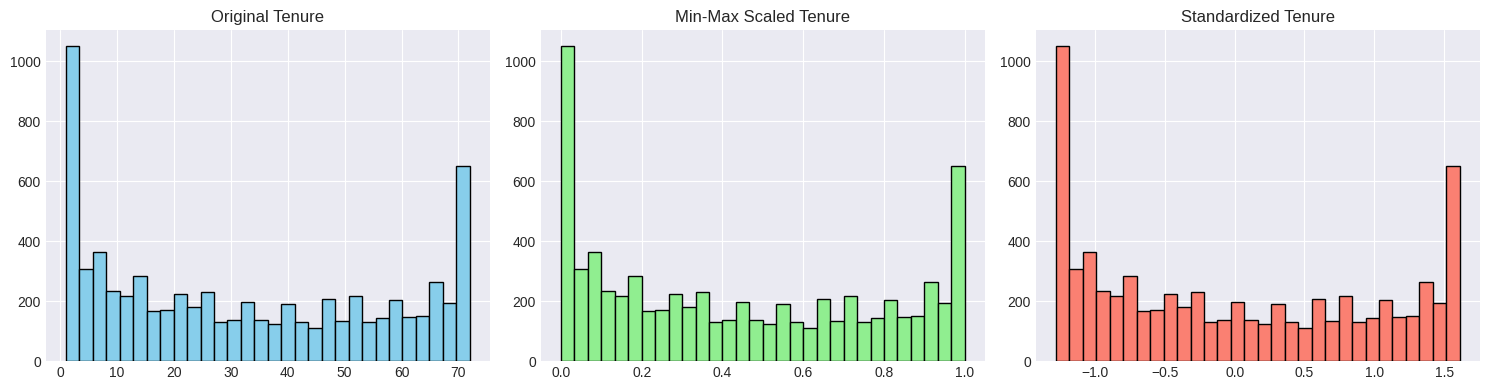

In [42]:
# === SEU CÓDIGO AQUI ===

fig_comparison, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original
axes[0].hist(df['tenure'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Original Tenure')

# Min-Max
axes[1].hist(scaled_minmax['tenure'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Min-Max Scaled Tenure')

# Standardized
axes[2].hist(scaled_standard['tenure'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Standardized Tenure')

plt.tight_layout()

In [43]:
grader.check("q9")

q9 results: All test cases passed!

---

## Análise Final

Vamos analisar as features criadas e suas correlações com Churn.

In [44]:
# Criar target binário
df['Churn_binary'] = (df['Churn'] == 'Yes').astype(int)

# Calcular correlações das novas features com Churn
new_features = ['AvgMonthlySpend', 'TotalServices', 'HighRiskProfile']

print("Correlação das novas features com Churn:\n")
for feat in new_features:
    corr = df[[feat, 'Churn_binary']].corr().iloc[0, 1]
    print(f"{feat:20s}: {corr:+.3f}")

print("\nInterpretação:")
print("- Valores positivos: aumentam probabilidade de churn")
print("- Valores negativos: reduzem probabilidade de churn")

Correlação das novas features com Churn:

AvgMonthlySpend     : +0.192
TotalServices       : -0.020
HighRiskProfile     : +0.123

Interpretação:
- Valores positivos: aumentam probabilidade de churn
- Valores negativos: reduzem probabilidade de churn


---

## Resumo

Nesta prática você:

1. Criou features derivadas através de Feature Engineering
2. Aplicou diferentes técnicas de encoding para variáveis categóricas
3. Normalizou dados usando Min-Max Scaling e Standardization
4. Comparou visualmente o efeito das transformações

**Próximos passos:**
- Experimente criar outras features criativas
- Teste diferentes combinações de encoding
- Compare o impacto de diferentes técnicas de normalização

**Parabéns por completar a prática!**